In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [2]:
ticker = 'ABEV3.SA'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2010-1-1')['Adj Close']

In [3]:
# Retorno logaritmico histórico
log_returns = np.log(1 + data.pct_change())

In [4]:
log_returns.head()

,ABEV3.SA
Date,
2010-01-04,NaN
2010-01-05,0.005865
2010-01-06,0.010150
2010-01-07,0.004685
2010-01-08,-0.001923


In [5]:
log_returns.tail()

,ABEV3.SA
Date,
2020-12-22,0.005820
2020-12-23,-0.000645
2020-12-28,0.017269
2020-12-29,0.011349
2020-12-30,-0.018988


<AxesSubplot:xlabel='Date'>

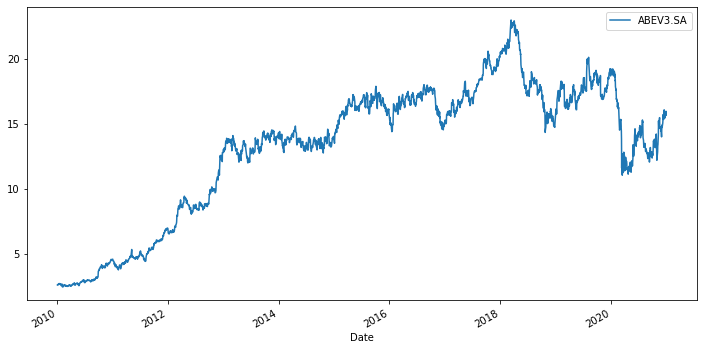

In [6]:
data.plot(figsize=(12, 6))

<AxesSubplot:xlabel='Date'>

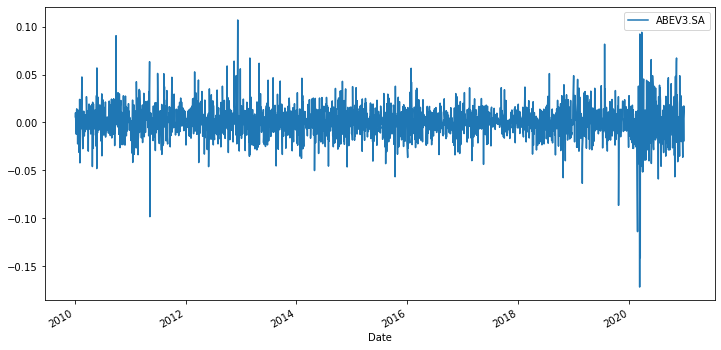

In [7]:
log_returns.plot(figsize = (12, 6))

In [8]:
# Média
log_returns.mean()

ABEV3.SA    0.000663
dtype: float64

In [9]:
# Média armazenada na variável u
u = log_returns.mean()
u

ABEV3.SA    0.000663
dtype: float64

In [10]:
var = log_returns.var()
var

ABEV3.SA    0.000285
dtype: float64

In [11]:
drift = u - (0.5 * var)
drift

ABEV3.SA    0.00052
dtype: float64

In [12]:
# Desvio padrão do retorno
stdev = log_returns.std()
stdev

ABEV3.SA    0.016895
dtype: float64

In [13]:
type(drift)

pandas.core.series.Series

In [14]:
type(stdev)

pandas.core.series.Series

In [15]:
# Convertendo em array
np.array(drift)

array([0.00052042])

In [16]:
# Transferindo para array numpy
drift.values

array([0.00052042])

In [17]:
stdev.values

array([0.01689455])

In [18]:
# Distância entre média e eventos, representado pelo números de desvio padrão
norm.ppf(0.95)

1.6448536269514722

In [19]:
x = np.random.rand(10, 2)
x

array([[0.07924382, 0.20707664],
       [0.64525217, 0.10048569],
       [0.57990323, 0.42892964],
       [0.78571824, 0.77540057],
       [0.355264  , 0.90037772],
       [0.84791093, 0.23037845],
       [0.83638084, 0.50339621],
       [0.95904187, 0.66109918],
       [0.34989271, 0.7990162 ],
       [0.33160217, 0.60056059]])

In [20]:
# Distância entre média e eventos de cada probabilidade aleatória
norm.ppf(x)

array([[-1.41017629, -0.81660659],
       [ 0.37253352, -1.27878897],
       [ 0.20164593, -0.17909987],
       [ 0.79165216,  0.75675132],
       [-0.37114706,  1.28370679],
       [ 1.02751477, -0.73760109],
       [ 0.97969172,  0.00851313],
       [ 1.73967407,  0.41546484],
       [-0.38561013,  0.83811236],
       [-0.43549337,  0.25479839]])

In [22]:
# Covertendo as distâncias das probabilidades em relação a média zero
z = norm.ppf(np.random.rand(10, 2))
z

array([[ 1.0527935 , -0.93418464],
       [ 0.95905003,  1.61103724],
       [ 0.49877374, -0.40373909],
       [-0.10744587,  0.7951632 ],
       [ 0.16774026,  0.28967463],
       [-0.20178238, -0.30374165],
       [-0.52710311, -2.48685521],
       [ 0.54889924,  1.09462911],
       [ 1.44397606, -0.74781207],
       [ 0.85640383,  1.37670909]])

In [23]:
# Definindo a previsão para 1000 dias
t_intervals = 1000
iterations = 10

In [24]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [25]:
daily_returns

array([[0.96875716, 0.98028604, 0.98956367, ..., 1.00241397, 0.99168852,
        1.01069959],
       [0.96859933, 0.99557292, 1.01219648, ..., 0.99225541, 0.96851423,
        1.00058163],
       [1.00916819, 0.95758529, 1.01689346, ..., 0.98202162, 0.99160612,
        0.97996509],
       ...,
       [1.00496296, 1.01322082, 0.97989771, ..., 0.99049597, 0.99933171,
        0.9988279 ],
       [0.99176788, 0.97992549, 0.97614043, ..., 0.99508897, 1.01358169,
        0.99629639],
       [1.00299362, 0.98570304, 1.00007301, ..., 0.98965159, 1.01647046,
        1.0142587 ]])

In [26]:
# Preço inicial
S0 = data.iloc[-1]
S0

ABEV3.SA    15.65
Name: 2020-12-30 00:00:00, dtype: float64

In [28]:
# Criando um array com as mesmas dimensões especificadas anteriormente e preenchendo com 0
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [29]:
# Substituir os 0 pelos preços esperados. Definindo a primeira linha (10 elementos) como S0
price_list[0] = S0
price_list

array([[15.64999962, 15.64999962, 15.64999962, ..., 15.64999962,
        15.64999962, 15.64999962],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [30]:
# Gerando valores para a lista de preços
for t in range(1, t_intervals):
    price_list[t] = price_list[t -1] * daily_returns[t]

In [31]:
price_list

array([[15.64999962, 15.64999962, 15.64999962, ..., 15.64999962,
        15.64999962, 15.64999962],
       [15.1585792 , 15.58071583, 15.84087449, ..., 15.52879683,
        15.15724738, 15.65910215],
       [15.29755587, 14.91986433, 16.10848169, ..., 15.24961426,
        15.0300193 , 15.34537352],
       ...,
       [19.8349724 , 27.68087296, 13.62891683, ..., 26.61857059,
        20.07495341, 33.4263958 ],
       [19.67168851, 27.12519304, 13.30373676, ..., 26.48784612,
        20.34760524, 33.30259754],
       [19.73057806, 26.73738537, 13.304708  , ..., 26.21373913,
        20.68273972, 33.77744915]])

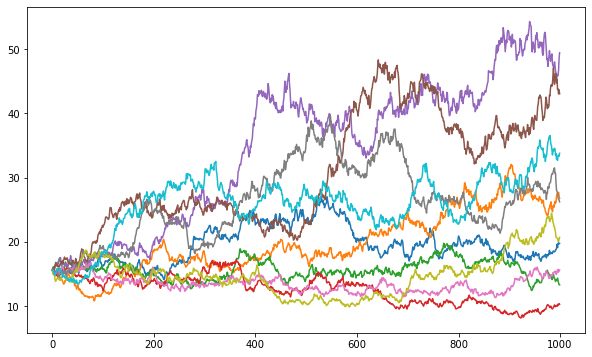

In [32]:
# 10 possíveis caminhos de preço para as ações ao longo de 1000 dias
plt.figure(figsize=(10, 6))
plt.plot(price_list);